<a href="https://colab.research.google.com/github/EBhuvan/Fault-detection-in-solar-panels/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset_path = '/content/drive/MyDrive/Faulty_solar_panel'


In [ ]:
import os
print(os.listdir(dataset_path))


['Bird-drop', 'Snow-Covered', 'Clean', 'Dusty', 'Physical-Damage', 'Electrical-damage', 'labels']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255)
data = datagen.flow_from_directory(dataset_path, target_size=(224, 224), batch_size=32, class_mode='binary')


Found 193 images belonging to 7 classes.


In [ ]:
test_image_path = '/content/drive/MyDrive/test4.jpg'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 157 images belonging to 7 classes.
Found 36 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

input_layer = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,335 (49.36 MB)

 Trainable params: 12,939,335 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 74s 9s/step - accuracy: 0.2573 - loss: 6.2258 - val_accuracy: 0.1389 - val_loss: 1.9555
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.2457 - loss: 1.9020 - val_accuracy: 0.2500 - val_loss: 1.7734
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.2852 - loss: 1.6849 - val_accuracy: 0.2500 - val_loss: 1.8438
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.3756 - loss: 1.5152 - val_accuracy: 0.3333 - val_loss: 1.4956
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.4045 - loss: 1.3224 - val_accuracy: 0.4722 - val_loss: 1.3183
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5229 - loss: 1.1382 - val_accuracy: 0.5278 - val_loss: 1.2862
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6991 - loss: 0.8658 - val_accuracy: 0.5833 - val_loss: 1.1845
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.8108 - loss: 0.5139 - val_accuracy: 0.5000 - val_loss: 1.2445
Epoch 9/10
5/5 ━━━━

In [ ]:
model.save('/content/drive/My Drive/RCNN_Faulty_Solar_Panel_Model.h5')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def predict_fault(image_path, model):
    # Load and preprocess the test image
    image = load_img(image_path, target_size=(224, 224))
    plt.imshow(image)
    plt.title("Test Image")
    plt.axis('off')
    plt.show()

    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Predict the fault type
    prediction = model.predict(image_array)
    class_labels = list(train_data.class_indices.keys())
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    print(f"Predicted Fault Type: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")


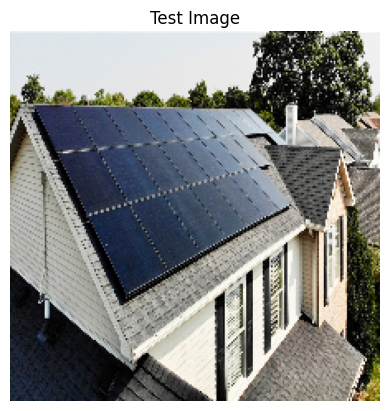

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted Fault Type: Dusty
Confidence: 98.85%


In [ ]:
import tensorflow as tf

# Load the trained model
trained_model = tf.keras.models.load_model('/content/drive/My Drive/RCNN_Faulty_Solar_Panel_Model.h5')

# Predict the fault in the test image
predict_fault(test_image_path, trained_model)
